In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Missing Value
# -----------------------------------
# !pip install missingno
import missingno as msno

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from termcolor import colored

In [2]:
#Read Dataset
River = pd.read_csv("River_Arno.csv")

In [3]:
River.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [4]:
#NA check
River.isna().sum()

Date                            0
Rainfall_Le_Croci            2191
Rainfall_Cavallina           2191
Rainfall_S_Agata             2191
Rainfall_Mangona             2191
Rainfall_S_Piero             2191
Rainfall_Vernio              3934
Rainfall_Stia                6934
Rainfall_Consuma             6934
Rainfall_Incisa              3649
Rainfall_Montevarchi         6570
Rainfall_S_Savino            6934
Rainfall_Laterina            6934
Rainfall_Bibbiena            5839
Rainfall_Camaldoli           6934
Temperature_Firenze          2025
Hydrometry_Nave_di_Rosano      48
dtype: int64

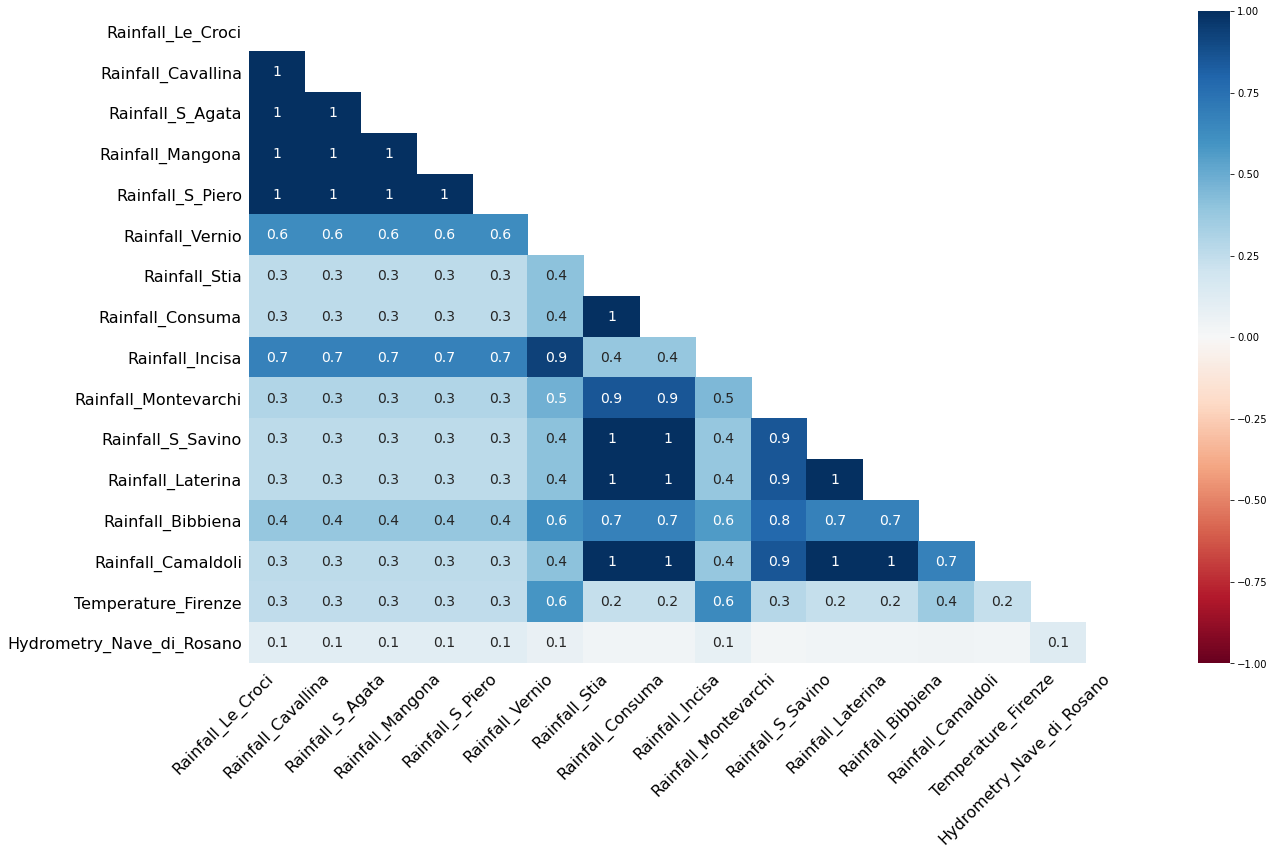

In [6]:
msno.heatmap(River)
plt.show()

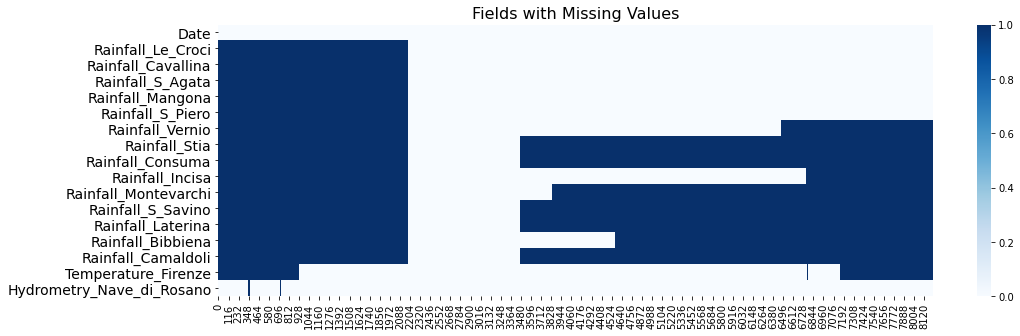

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(River.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [8]:
#Change Date formate
River['date'] = River['Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
y = River.iloc[0]['date'].year
River['year-month'] = River['date'].apply(lambda x: int((x.year-y)*12+x.month))
River['year/month'] = River['date'].apply(lambda x:str(x.year) + "/" + str(x.month))
River['year'] = River['date'].apply(lambda x: int(x.year))
River['month'] = River['date'].apply(lambda x: int(x.month))
River['day'] = River['date'].apply(lambda x: int(x.day))

In [9]:
#move date to the front
col = list(River)
River = River[['Date', 'date', 'year-month','year/month' ,'year', 'month', 'day', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio', 'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa', 'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina', 'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano']]

In [20]:
sum_River = River.groupby(['month','day'],as_index=False).agg({'Temperature_Firenze':'mean'})
sum_River

,month,day,Temperature_Firenze
0,1,1,6.56
1,1,2,7.44
2,1,3,7.61
3,1,4,6.69
4,1,5,6.61
...,...,...,...
361,12,27,7.04
362,12,28,6.66
363,12,29,7.24
364,12,30,7.14


In [21]:
numbers = sum_River['Temperature_Firenze']
window_size = 3

i = 0
moving_averages = []
while i < len(numbers) - window_size + 1:
    this_window = numbers[i : i + window_size]
    
    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1

In [22]:
moving_averages.append(7.14)
moving_averages.append(7.16)
sum_River['MA'] = moving_averages

In [23]:
mergedData= pd.merge(River,sum_River, how='left' ,left_on=['month','day'], right_on=['month','day'])
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8217 entries, 0 to 8216
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8217 non-null   object        
 1   date                       8217 non-null   datetime64[ns]
 2   year-month                 8217 non-null   int64         
 3   year/month                 8217 non-null   object        
 4   year                       8217 non-null   int64         
 5   month                      8217 non-null   int64         
 6   day                        8217 non-null   int64         
 7   Rainfall_Le_Croci          6026 non-null   float64       
 8   Rainfall_Cavallina         6026 non-null   float64       
 9   Rainfall_S_Agata           6026 non-null   float64       
 10  Rainfall_Mangona           6026 non-null   float64       
 11  Rainfall_S_Piero           6026 non-null   float64       
 12  Rainfa

In [25]:
mergedData.Temperature_Firenze_x.fillna(mergedData.Temperature_Firenze_y, inplace=True)
mergedData = mergedData.drop(columns=['Temperature_Firenze_y','MA'])

mergedData.info()

In [28]:
mergedData = mergedData.iloc[2191:8127,:]

In [29]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 2191 to 8126
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5936 non-null   object        
 1   date                       5936 non-null   datetime64[ns]
 2   year-month                 5936 non-null   int64         
 3   year/month                 5936 non-null   object        
 4   year                       5936 non-null   int64         
 5   month                      5936 non-null   int64         
 6   day                        5936 non-null   int64         
 7   Rainfall_Le_Croci          5936 non-null   float64       
 8   Rainfall_Cavallina         5936 non-null   float64       
 9   Rainfall_S_Agata           5936 non-null   float64       
 10  Rainfall_Mangona           5936 non-null   float64       
 11  Rainfall_S_Piero           5936 non-null   float64       
 12  Rai

In [30]:
mergedData['Spring'] = 0
mergedData['Summer'] = 0
mergedData['Autumn'] = 0
mergedData['Winter'] = 0

mergedData = mergeddata.iloc[2191:8127,:]

In [31]:
mergedData.loc[np.logical_and(3 <= mergedData['month'], mergedData['month'] <= 5), 'Spring'] = 1
mergedData.loc[np.logical_and(6 <= mergedData['month'], mergedData['month'] <= 8), 'Summer'] = 1
mergedData.loc[np.logical_and(9 <= mergedData['month'], mergedData['month'] <= 11), 'Autumn'] = 1
mergedData.loc[np.logical_and(12 == mergedData['month'], mergedData['month'] <= 2), 'Winter'] = 1

In [35]:
sum_m = mergedData.groupby(['month'],as_index=False).agg({'Rainfall_Mangona': 'mean', 'Rainfall_S_Piero': 'mean', 'Rainfall_Vernio': 'mean', 'Rainfall_Stia': 'mean', 'Rainfall_Consuma': 'mean', 'Rainfall_Incisa': 'mean', 'Rainfall_Montevarchi': 'mean', 'Rainfall_S_Savino': 'mean', 'Rainfall_Laterina': 'mean', 'Rainfall_Bibbiena': 'mean', 'Rainfall_Camaldoli': 'mean'})
sum_m

,month,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli
0,1,3.73,3.01,2.78,4.09,2.73,4.46,2.35,2.97,2.43,1.66,1.89,1.16,3.09,2.51
1,2,4.26,3.65,3.43,4.55,3.31,4.30,2.60,3.92,2.78,1.96,2.56,1.91,2.92,3.08
2,3,3.64,3.11,2.86,3.56,2.74,4.14,2.46,3.31,2.30,1.89,2.25,1.90,2.54,3.79
3,4,2.52,1.97,2.18,2.60,1.90,2.64,2.19,2.58,1.89,1.58,2.05,1.86,2.18,4.26
4,5,2.83,2.14,2.57,3.09,2.13,2.68,2.29,3.38,2.19,1.73,2.45,1.85,2.57,3.91
5,6,1.80,1.30,1.55,1.64,1.31,1.61,1.07,1.60,1.58,1.60,0.98,0.88,1.35,1.85
6,7,0.97,0.86,0.97,1.11,0.82,0.97,1.39,1.09,0.97,0.93,0.65,0.49,0.79,1.59
7,8,1.71,1.35,1.34,1.42,1.28,1.78,1.95,2.94,1.46,1.54,1.05,1.77,0.99,2.54
8,9,2.95,2.65,2.81,2.91,2.41,3.01,3.16,5.37,2.64,3.54,3.42,3.66,3.17,5.03
9,10,3.58,3.24,3.40,4.14,3.04,4.67,3.58,4.17,3.21,3.04,4.87,4.19,3.59,6.50


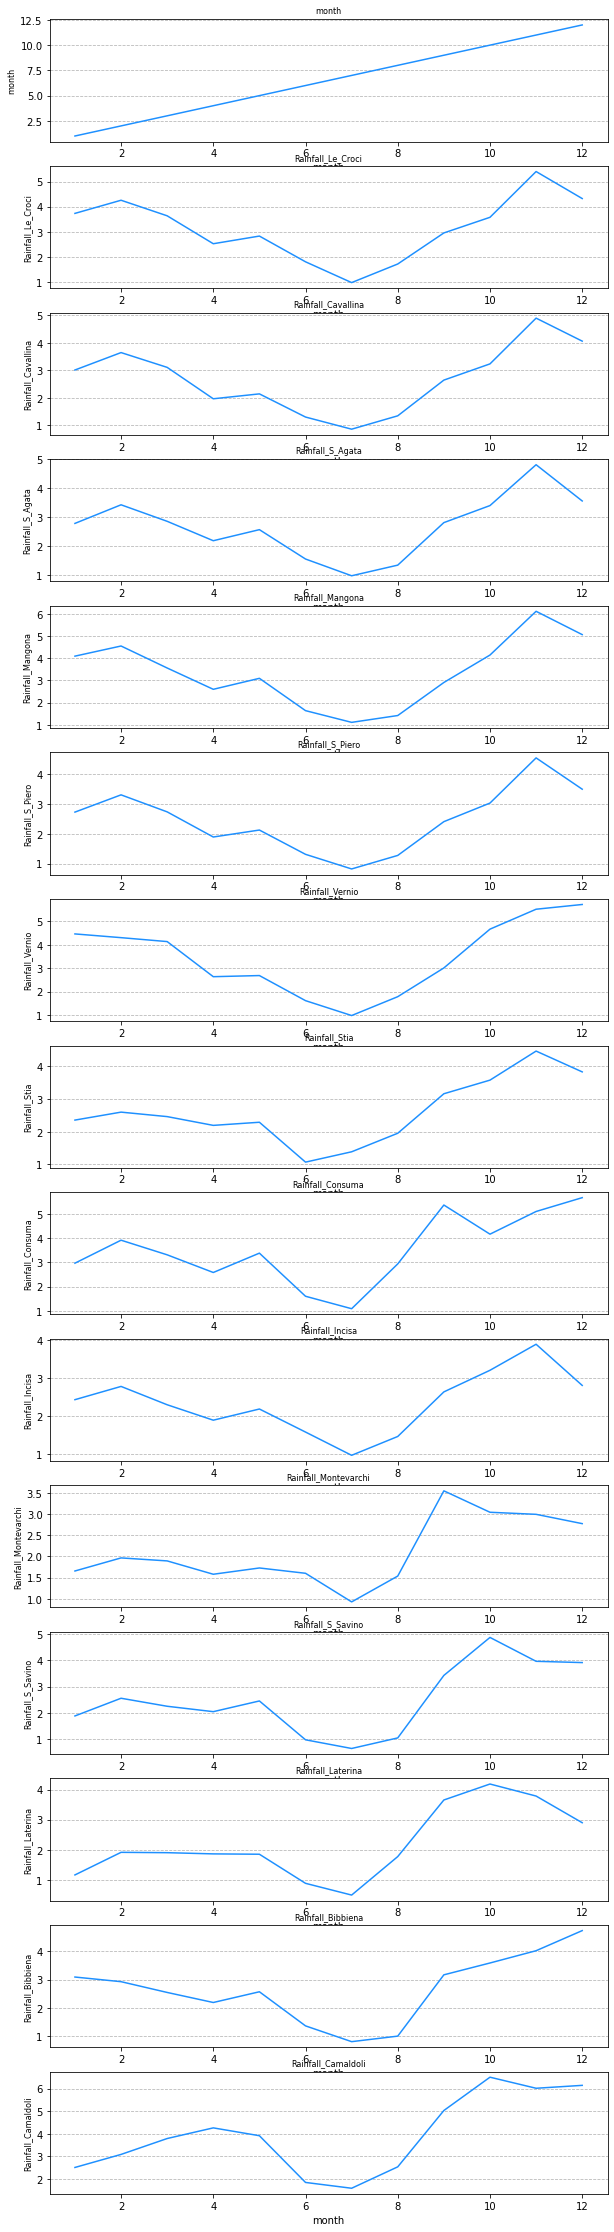

In [37]:
def vis1(data):
    list_col = data.columns.tolist()
    fig, ax = plt.subplots(nrows=len(list_col), ncols=1, figsize=(10,40))



    for i in range(len(list_col)):
        sns.lineplot(x=data.month, y=(data.iloc[:,i]).fillna(np.inf), ax=ax[i], color='dodgerblue')
        ax[i].set_title(list_col[i], fontsize=8)
        ax[i].set_ylabel(ylabel=list_col[i], fontsize=8)
        
#         ax[i].set_xlim(date(2004,1,1), date(2010,1,1))
        ax[i].grid(axis = 'y', linestyle = '--', alpha = 0.9)
        # 设置坐标刻度值的大小以及刻度值的字体

        
        
vis1(sum_m)

In [38]:
col = list(mergedData)
col

['Date',
 'date',
 'year-month',
 'year/month',
 'year',
 'month',
 'day',
 'Rainfall_Le_Croci',
 'Rainfall_Cavallina',
 'Rainfall_S_Agata',
 'Rainfall_Mangona',
 'Rainfall_S_Piero',
 'Rainfall_Vernio',
 'Rainfall_Stia',
 'Rainfall_Consuma',
 'Rainfall_Incisa',
 'Rainfall_Montevarchi',
 'Rainfall_S_Savino',
 'Rainfall_Laterina',
 'Rainfall_Bibbiena',
 'Rainfall_Camaldoli',
 'Temperature_Firenze_x',
 'Hydrometry_Nave_di_Rosano',
 'Spring',
 'Summer',
 'Autumn',
 'Winter']

In [78]:
Test = mergedData.drop(columns=['Rainfall_Stia',
 'Rainfall_Consuma',
 'Rainfall_Incisa',
 'Rainfall_Montevarchi',
 'Rainfall_S_Savino',
 'Rainfall_Laterina',
'Rainfall_Vernio',
 'Rainfall_Bibbiena',
 'Rainfall_Camaldoli','Date'])

In [79]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 2191 to 8126
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       5936 non-null   datetime64[ns]
 1   year-month                 5936 non-null   int64         
 2   year/month                 5936 non-null   object        
 3   year                       5936 non-null   int64         
 4   month                      5936 non-null   int64         
 5   day                        5936 non-null   int64         
 6   Rainfall_Le_Croci          5936 non-null   float64       
 7   Rainfall_Cavallina         5936 non-null   float64       
 8   Rainfall_S_Agata           5936 non-null   float64       
 9   Rainfall_Mangona           5936 non-null   float64       
 10  Rainfall_S_Piero           5936 non-null   float64       
 11  Temperature_Firenze_x      5936 non-null   float64       
 12  Hyd

The first 3 PCA components already explained 95.0% of variance.


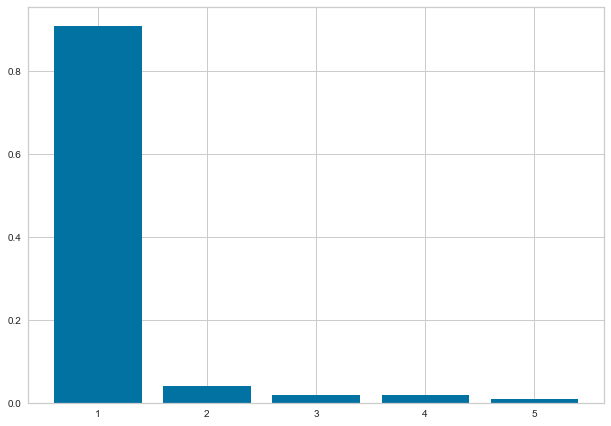

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

X = Test[[ f for f in Test.columns if f.startswith('Rain')]]
k = 5
pca = PCA(n_components=k)
pca.fit(X)
v = pca.explained_variance_ratio_.round(2)
print("The first 3 PCA components already explained {}% of variance.".format((v[0]+v[1])*100))
ax.bar(range(1,k+1),v)
plt.show()

In [81]:
from sklearn.decomposition import PCA
X = Test[[ f for f in Test.columns if f.startswith('Rain')]]
X_reduced = PCA(n_components=1).fit_transform(X)
pf = pd.DataFrame(X_reduced, columns=['PCA1'])
Test['PCA1'] = pf['PCA1']



In [82]:
#Test = Test.drop(columns = [ f for f in Test.columns if f.startswith('Rain')])

In [83]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 2191 to 8126
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       5936 non-null   datetime64[ns]
 1   year-month                 5936 non-null   int64         
 2   year/month                 5936 non-null   object        
 3   year                       5936 non-null   int64         
 4   month                      5936 non-null   int64         
 5   day                        5936 non-null   int64         
 6   Rainfall_Le_Croci          5936 non-null   float64       
 7   Rainfall_Cavallina         5936 non-null   float64       
 8   Rainfall_S_Agata           5936 non-null   float64       
 9   Rainfall_Mangona           5936 non-null   float64       
 10  Rainfall_S_Piero           5936 non-null   float64       
 11  Temperature_Firenze_x      5936 non-null   float64       
 12  Hyd

In [86]:
from pycaret.regression import * 

exp_reg = setup(Test,target='Hydrometry_Nave_di_Rosano',session_id=13,feature_selection = True,remove_multicollinearity = True,pca = True, pca_components = 5,use_gpu = True)

,Description,Value
0,session_id,13
1,Target,Hydrometry_Nave_di_Rosano
2,Original Data,"(5936, 18)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4154, 5)"


In [88]:
exp_reg

('3c58',
 True,
 10,
 [('Setup Config',
                                  Description                      Value
   0                               session_id                         13
   1                                   Target  Hydrometry_Nave_di_Rosano
   2                            Original Data                 (5936, 18)
   3                           Missing Values                       True
   4                         Numeric Features                          9
   5                     Categorical Features                          6
   6                         Ordinal Features                      False
   7                High Cardinality Features                      False
   8                  High Cardinality Method                       None
   9                    Transformed Train Set                  (4154, 5)
   10                    Transformed Test Set                  (1781, 5)
   11                      Shuffle Train-Test                       True
   12      

In [87]:

best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2345,0.1651,0.4050,0.6106,0.1327,0.1376,0.1210
catboost,CatBoost Regressor,0.2345,0.1674,0.4077,0.6060,0.1330,0.1391,4.2970
xgboost,Extreme Gradient Boosting,0.2379,0.1797,0.4222,0.5769,0.1372,0.1389,1.0340
rf,Random Forest Regressor,0.2384,0.1822,0.4256,0.5706,0.1413,0.1412,0.8030
et,Extra Trees Regressor,0.2402,0.1862,0.4300,0.5620,0.1496,0.1381,0.8370
gbr,Gradient Boosting Regressor,0.2660,0.1950,0.4405,0.5401,0.1456,0.1612,0.4710
knn,K Neighbors Regressor,0.2853,0.2504,0.4990,0.4086,0.1824,0.1636,0.3080
dt,Decision Tree Regressor,0.2932,0.3123,0.5576,0.2593,0.1770,0.1762,0.0230
br,Bayesian Ridge,0.3655,0.3272,0.5710,0.2273,0.2262,0.2055,0.0080
ridge,Ridge Regression,0.3657,0.3272,0.5710,0.2273,0.2262,0.2057,0.0070


In [89]:
light = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2368,0.1901,0.4360,0.5999,0.1445,0.1350
1,0.2361,0.1730,0.4159,0.6127,0.1416,0.1401
2,0.2409,0.2020,0.4494,0.6012,0.1356,0.1393
3,0.2414,0.1625,0.4031,0.6330,0.1236,0.1404
4,0.2165,0.1139,0.3376,0.7028,0.1149,0.1323
5,0.2363,0.1908,0.4368,0.5201,0.1371,0.1353
6,0.2395,0.1550,0.3937,0.6162,0.1288,0.1405
7,0.2348,0.1797,0.4239,0.5661,0.1383,0.1409
8,0.2384,0.1525,0.3905,0.6235,0.1383,0.1372
9,0.2241,0.1315,0.3626,0.6304,0.1244,0.1346


In [ ]:
e

In [90]:

tune_light = tune_model(light)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2541,0.2176,0.4665,0.5419,0.1579,0.1442
1,0.2423,0.1716,0.4142,0.6159,0.1410,0.1473
2,0.2597,0.2105,0.4588,0.5844,0.1398,0.1505
3,0.2603,0.1816,0.4261,0.5900,0.1345,0.1540
4,0.2332,0.1300,0.3605,0.6611,0.1237,0.1440
5,0.2525,0.2066,0.4545,0.4804,0.1440,0.1466
6,0.2567,0.1721,0.4148,0.5739,0.1363,0.1528
7,0.2358,0.1914,0.4375,0.5377,0.1459,0.1393
8,0.2599,0.1638,0.4047,0.5955,0.1444,0.1534
9,0.2333,0.1327,0.3643,0.6269,0.1260,0.1451


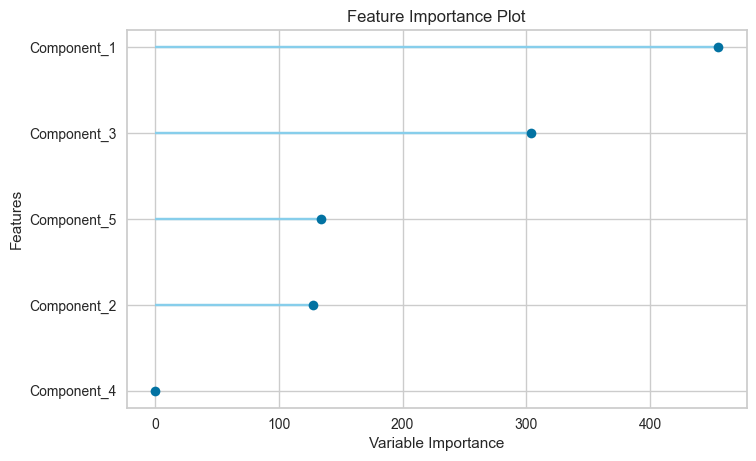

In [92]:
plot_model(tune_light, plot='feature')

TypeError: list indices must be integers or slices, not tuple